In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


## Data Cleaning

In [19]:
df= pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [20]:
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
def clean_data(data):
    #lets drop row where gender equals to 'others'
    data.drop(data[data['gender'] == 'Other' ].index, inplace=True)
    #change the type of hypertension and heart_disease to object.
    data['hypertension'] = data['hypertension'].astype(object)
    data['heart_disease'] = data['heart_disease'].astype(object)
    
    # Lets separate the dataset into each gender.
    #This will allow us fill the missing values based on the mean of individual gender.
    maledf = data[data['gender']=='Male']
    femaledf = data[data['gender']=='Female']
    
    
    #filling missing values based on the mean of each gender variable
    maledf['bmi'].fillna(round(maledf['bmi'].mean(), 2), inplace=True)
    femaledf['bmi'].fillna(round(femaledf['bmi'].mean(), 2), inplace=True)
    
    # We are done with the cleaning lets merge the two data frame back
    frames = [maledf, femaledf]
    df= pd.concat(frames)
    
    return df

In [22]:
#checking for missing values 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:
df = clean_data(df)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   object 
 4   heart_disease      5109 non-null   object 
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 518.9+ KB


In [27]:
cat = [ var for var in df.columns if df[var].dtype == 'O' ]
num = [ var for var in df.columns if df[var].dtype != 'O' ]

In [28]:
len(cat), len(num)

(7, 5)

In [29]:
for var in df.columns:
    if df[var].dtype == 'object':
        print(df[var].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64
0    4611
1     498
Name: hypertension, dtype: int64
0    4833
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1756
Name: ever_married, dtype: int64
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


## EDA with Panda Profilling

In [30]:
from pandas_profiling import ProfileReport

In [31]:
profile = ProfileReport(df, title="StrokePredictionEDA")

In [32]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
print(len(cat))
print(len(num))
print('The categorical variables include: ', cat)
print('The numerical variables include : ', num)

7
5
The categorical variables include:  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
The numerical variables include :  ['id', 'age', 'avg_glucose_level', 'bmi', 'stroke']


## EDA

In [35]:
df[num].describe()

,id,age,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,106.140399,28.892913,0.048738
std,21162.008804,22.613575,45.285004,7.698352,0.215340
min,67.000000,0.080000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


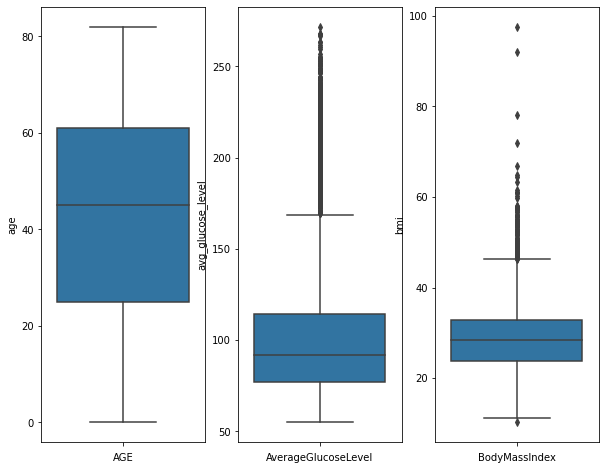

In [36]:
plt.figure(figsize=((10,8)))

plt.subplot(1,3,1)
sns.boxplot(y='age', data=df )
plt.xlabel('AGE')

plt.subplot(1,3,2)
sns.boxplot(y='avg_glucose_level', data=df)
plt.xlabel('AverageGlucoseLevel')

plt.subplot(1,3,3)
sns.boxplot(y='bmi', data=df)
plt.xlabel('BodyMassIndex')



plt.show()

## Removing Outliers

In [38]:
def remove_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low_band  = q1-1.5*iqr
    high_band = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > low_band) & (df[col_name] < high_band)]
    return df_out

In [39]:
dff = remove_outlier(df, 'bmi')

In [41]:
dff2 = remove_outlier(dff,'avg_glucose_level')

In [42]:
dff2.shape

(4481, 12)

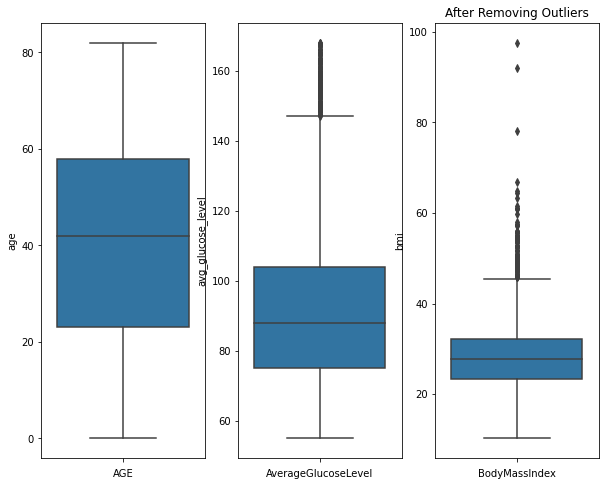

In [44]:
plt.figure(figsize=((10,8)))

plt.subplot(1,3,1)
sns.boxplot(y='age', data=dff2 )
plt.xlabel('AGE')

plt.subplot(1,3,2)
sns.boxplot(y='avg_glucose_level', data=dff2)
plt.xlabel('AverageGlucoseLevel')

plt.subplot(1,3,3)
sns.boxplot(y='bmi', data=dff2)
plt.xlabel('BodyMassIndex')



plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

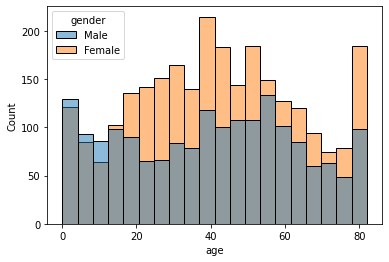

In [45]:
sns.histplot(data=dff2, x="age", 
             #kde=True, 
            hue="gender")

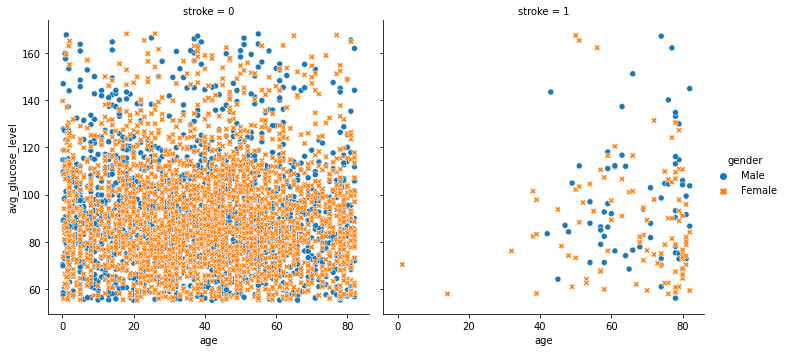

In [46]:
sns.relplot(
    data=dff2, x="age", y="avg_glucose_level",
    col="stroke", hue="gender", style="gender",
    kind="scatter"
)

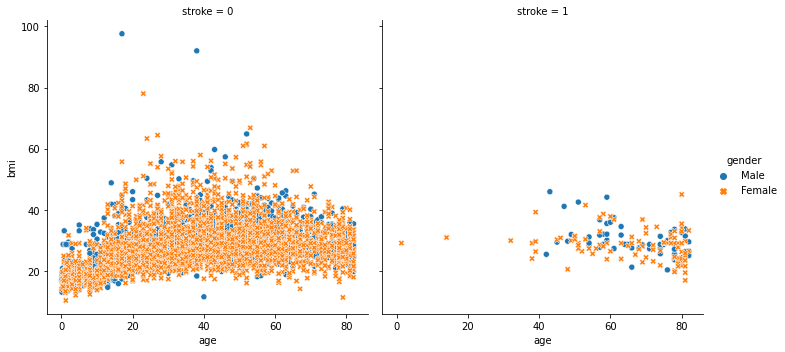

In [47]:
sns.relplot(
    data=dff2, x="age", y="bmi",
    col="stroke", hue="gender", style="gender",
    kind="scatter"
)

* The count plot on the target variable shows that the data set is  an imbalance dataset, since we have a class with majority of more than 90%.

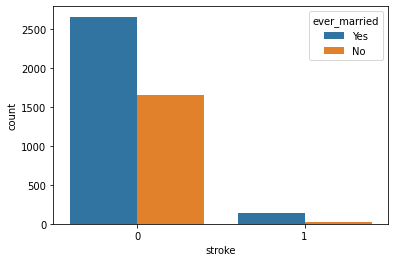

In [48]:
sns.countplot(x='stroke', data=dff2,hue='ever_married' )
plt.show()

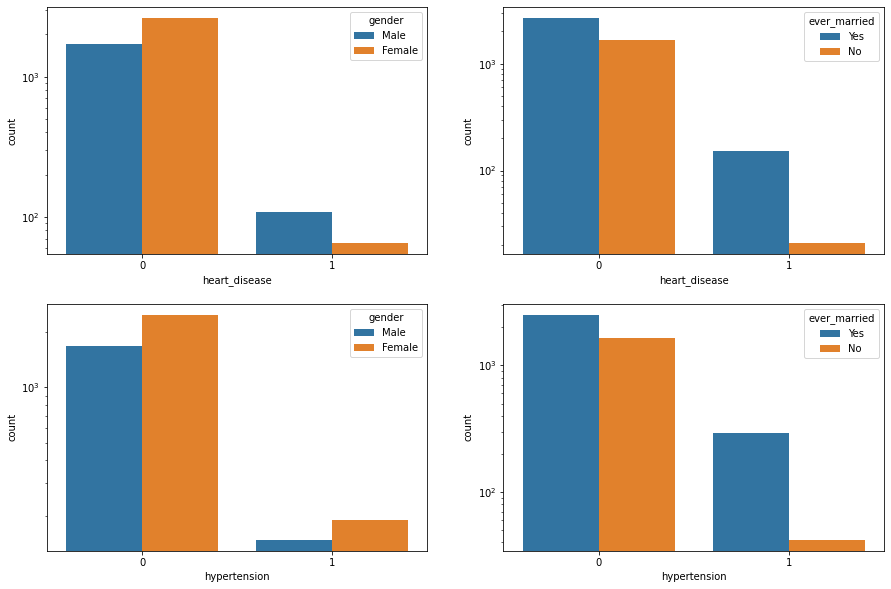

In [49]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.countplot(x='heart_disease', data=dff2,hue='gender' )
plt.yscale('log')

plt.subplot(222)
sns.countplot(x='heart_disease', data=dff2,hue='ever_married')
plt.yscale('log')

plt.subplot(223)
sns.countplot(x='hypertension', data=dff2,hue='gender' )
plt.yscale('log')

plt.subplot(224)
sns.countplot(x='hypertension', data=dff2,hue='ever_married' )
plt.yscale('log')


plt.show()

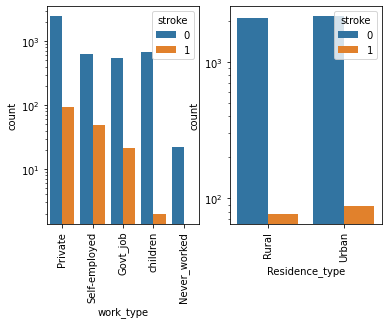

In [50]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x='work_type', data=dff2,hue='stroke' )
plt.yscale('log')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Residence_type', data=dff2,hue='stroke' )
plt.yscale('log')
plt.xticks(rotation=90)

plt.show()

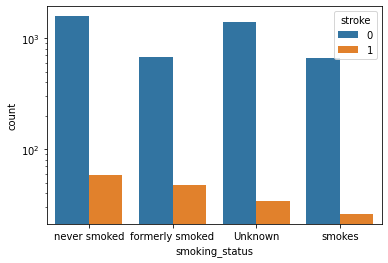

In [51]:

sns.countplot(x='smoking_status', data=dff2,hue='stroke' )
plt.yscale('log')

plt.show()

In [52]:
dff2[cat].head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
2,Male,0,1,Yes,Private,Rural,never smoked
6,Male,1,1,Yes,Private,Rural,never smoked
24,Male,0,0,Yes,Private,Urban,formerly smoked
25,Male,0,0,Yes,Self-employed,Rural,never smoked
31,Male,0,0,Yes,Private,Rural,Unknown


In [53]:
#Add to function
dff2['ever_married']=dff2['ever_married'].map({'No':0,'Yes':1})
dff2['Residence_type']=dff2['Residence_type'].map({'Urban':0, 'Rural':1})

dff2['smoking_status']=dff2['smoking_status'].map({'never smoked':0, 'Unknown':1,'formerly smoked':2,'smokes':3})


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [54]:
dff2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.5,0,1
6,53882,Male,74.0,1,1,1,Private,1,70.09,27.4,0,1
24,4219,Male,71.0,0,0,1,Private,0,102.87,27.2,2,1
25,70822,Male,80.0,0,0,1,Self-employed,1,104.12,23.5,0,1
31,33879,Male,42.0,0,0,1,Private,1,83.41,25.4,1,1


<AxesSubplot:xlabel='stroke', ylabel='count'>

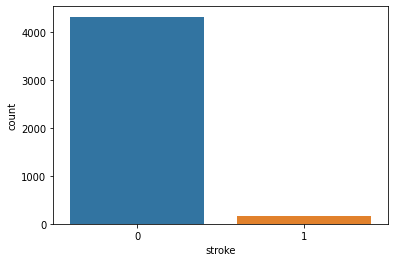

In [55]:
sns.countplot(data=dff2, x='stroke')

In [56]:
dff2['stroke'].value_counts(normalize=True)

0    0.963178
1    0.036822
Name: stroke, dtype: float64

* From the value count of the predictor class, over 95% of the observations belong to those who donot have stroke while about 5% of the obervations are classified as having stroke.
* This type of problem is a case of imbalance data. If we go ahead to build a model without addressing the class imbalance, it will affect the ability of our model to correctly predict the few observations that have stroke.
* This is because, the model will learn patterns to classify the non stroke group better than those with stroke.

## Addressing the Imbalance data set before building the model

In [63]:
X=dff2.drop(['id','stroke'], axis=1)
y= dff2['stroke'].values

In [58]:
#x_col = X.columns

In [59]:
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [60]:
ohe_X = pd.get_dummies(X, columns = ['gender','work_type'])

In [61]:
ohe_X

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,80.0,0,1,1,1,105.92,32.50,0,0,1,0,0,1,0,0
6,74.0,1,1,1,1,70.09,27.40,0,0,1,0,0,1,0,0
24,71.0,0,0,1,0,102.87,27.20,2,0,1,0,0,1,0,0
25,80.0,0,0,1,1,104.12,23.50,0,0,1,0,0,0,1,0
31,42.0,0,0,1,1,83.41,25.40,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,1,103.08,18.60,1,1,0,0,0,0,0,1
5105,80.0,1,0,1,0,83.75,29.07,0,1,0,0,0,1,0,0
5106,81.0,0,0,1,0,125.20,40.00,0,1,0,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.60,0,1,0,0,0,0,1,0


In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe_X, y, test_size=0.3, random_state=42)

In [65]:
sm = SMOTE(random_state=42)
print('Trained dataset shape %s' % Counter(ytrain))
xtrainres, ytrainres = sm.fit_resample(xtrain, ytrain)
print('Resampled dataset shape %s' % Counter(ytrainres))

Trained dataset shape Counter({0: 3020, 1: 116})
Resampled dataset shape Counter({0: 3020, 1: 3020})


In [66]:
#Using pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipe.fit(xtrainres, ytrainres)
pipe_pred = pipe.predict(xtest)
pipe_acc= round(pipe.score(xtest, ytest)*100, 2)
pipe_acc

90.78

* Our pipeline involve scaling the dataset before applying logistic regression model to the dataset.
* It achieve and accuarcy of 90.78% 
* Let's take a look at the first 10 predictions below.
* Note that accuracy is the best metric of evaluation in an imbalance dataset.
* Due to this we are going to perform other evaluation procedure such as confusion matrix and classification report in order to get a better idea od the performnace of our model.
* Before that, I will use use logistic regression without nomalization and then an ensemble techniques, this should give us three model to compare.

In [67]:
pipe_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [68]:
rf = RandomForestClassifier(random_state=0)
lr = LogisticRegression()

In [69]:
def model_acc_pred(md):
    md.fit(xtrainres, ytrainres)
    md_pred = md.predict(xtest)
    acc=round(md.score(xtest, ytest)* 100, 2)
    return acc, md_pred    

In [70]:
lr_acc, lr_pred=model_acc_pred(lr)
rf_acc, rf_pred=model_acc_pred(rf)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [71]:
print( f"The Logistic Regression accuracy without normalization is {lr_acc}")
print( f"The Random Forest Classifier accuracy  is {rf_acc}")

The Logistic Regression accuracy without normalization is 89.44
The Random Forest Classifier accuracy  is 95.61


* Wow, does this means that Random forest classifier which gave an accuracy of 95.6% is the best??
* Well, only confusion matrix and classification report can tell.
* Let's go and check them out.

## Evaluation

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [73]:
confusion_matrix(ytest, pipe_pred)

array([[1206,   90],
       [  34,   15]])

In [74]:
confusion_matrix(ytest, lr_pred)

array([[1181,  115],
       [  27,   22]])

In [75]:
confusion_matrix(ytest, rf_pred)

array([[1282,   14],
       [  45,    4]])

#### OUTCOME:
* Random forest which has the highest accuracy of 95.6% turns out to have the worst performance as its confusion matrix reveal that it wasn't able to correctly classified most of the observation which belong to the stroke group. Infact it only was able to identify 4 of them.
* Logistic Regression without and with nomalization where able to perform better in correctly classifying more of the stroke observations, 15 and 22 respectively more than random forest. Well, this tells us that bigger model doesn't means bigger performance.
* We can compare the confusion matrix of the two Logistic regression to pick the best model.

In [76]:
#Standardized dataset with LR

target_names = ['class 0', 'class 1']
print(classification_report(ytest, pipe_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.93      0.95      1296
     class 1       0.14      0.31      0.19        49

    accuracy                           0.91      1345
   macro avg       0.56      0.62      0.57      1345
weighted avg       0.94      0.91      0.92      1345



In [77]:
#Logistic regression without nomalization

target_names = ['class 0', 'class 1']
print(classification_report(ytest, lr_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.91      0.94      1296
     class 1       0.16      0.45      0.24        49

    accuracy                           0.89      1345
   macro avg       0.57      0.68      0.59      1345
weighted avg       0.95      0.89      0.92      1345



In [78]:
#dataset with RF

target_names = ['class 0', 'class 1']
print(classification_report(ytest, rf_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98      1296
     class 1       0.22      0.08      0.12        49

    accuracy                           0.96      1345
   macro avg       0.59      0.54      0.55      1345
weighted avg       0.94      0.96      0.95      1345



## What Next

* Try some other classificatiom model.
* remove all the outliers in bmi and average glucose level
* try feature selection to select only variables that will be significant to the prediction.
* try other sampling techniques to balance the dataset. such as under sampling or oversampling.